<a href="https://colab.research.google.com/github/calllummm/Country-Populations-Regression-Analysis/blob/main/PredictingCountryPopulationsProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

Dataset Description

*   From R repositories, there is a data set that contains time series' of countries and their population change between the years of 1960 and 2022.
*   Without demongraphic indicators, external context will be applied to make implications about the data processing techinques at use.
*   Most of the world's soverign states, micronations, and depedent territories are covered here. With 13545 rows of data representing a 62 year time series evaluation of each represented country, there are approximately 218 accounted for in this data file
*   Informaton was derived from World Bank Group, widely acknowledged as an authoritative source




Data Transformation

Variable Descriptions



*   country_name: lists the formal name for each country
*   country_code_2: abbreviation of formal country name
*   country_code_3: modified abbreviation of formal country name
*   year: single element of time series coverage for each country
*   population: census population for each year covered



Target Identifier

In [ ]:
import pandas as pd

In [ ]:
# import datafile
from google.colab import files
uploaded = files.upload()

Saving countrypops.csv to countrypops (1).csv


In [ ]:
# population is the desired target variable
country_df = pd.read_csv('countrypops.csv')
country_df.head()

,rownames,country_name,country_code_2,country_code_3,year,population
0,1,Aruba,AW,ABW,1960,54608.0
1,2,Aruba,AW,ABW,1961,55811.0
2,3,Aruba,AW,ABW,1962,56682.0
3,4,Aruba,AW,ABW,1963,57475.0
4,5,Aruba,AW,ABW,1964,58178.0


In [ ]:
# remove unnecessary columns
country_df = country_df.drop(columns=['rownames', 'country_code_2', 'country_code_3'])
country_df.head()

,country_name,year,population
0,Aruba,1960,54608.0
1,Aruba,1961,55811.0
2,Aruba,1962,56682.0
3,Aruba,1963,57475.0
4,Aruba,1964,58178.0


In [ ]:
# handle formatting inconsistencies
country_df['country_name'] = country_df['country_name'].str.strip().str.title()
# remove potential duplicates
print((f"Number of existing duplicates: {country_df.duplicated().sum()}"))

Number of existing duplicates: 0


In [ ]:
# confirm that all potential errors are accounted for
country_df['population'] = country_df['population'].apply(lambda x: x if x >= 0 else None)

In [ ]:
# determine if any missing values
print(country_df.isnull().sum())

country_name     0
year             0
population      30
dtype: int64


Preprocessing Data

In [ ]:
# handle missing data through sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=pd.NA, strategy='mean')
country_df['population'] = imputer.fit_transform(country_df[['population']])

In [ ]:
# reconfirm null data value
print(country_df.isnull().sum())

country_name    0
year            0
population      0
dtype: int64


**BODY**

In [ ]:
# print statistical summary
summary_stats = country_df[['population']].describe()
print(summary_stats)

         population
count  1.354500e+04
mean   2.511004e+07
std    1.046348e+08
min    2.646000e+03
25%    5.105720e+05
50%    4.306048e+06
75%    1.400906e+07
max    1.417173e+09


*   e+___ indicates how many digits are the in a number value (i.e. e+06 is between 1 million and less than 10 million)

In [ ]:
# additional statistics
mean_pop = country_df['population'].mean()
median_pop = country_df['population'].median()
std_pop = country_df['population'].std()
print(f"Mean Population: {mean_pop}")
print(f"Median Population: {median_pop}")
print(f"Standard Deviation of Population: {std_pop}")

Mean Population: 25110039.644321125
Median Population: 4306048.0
Standard Deviation of Population: 104634798.93094748


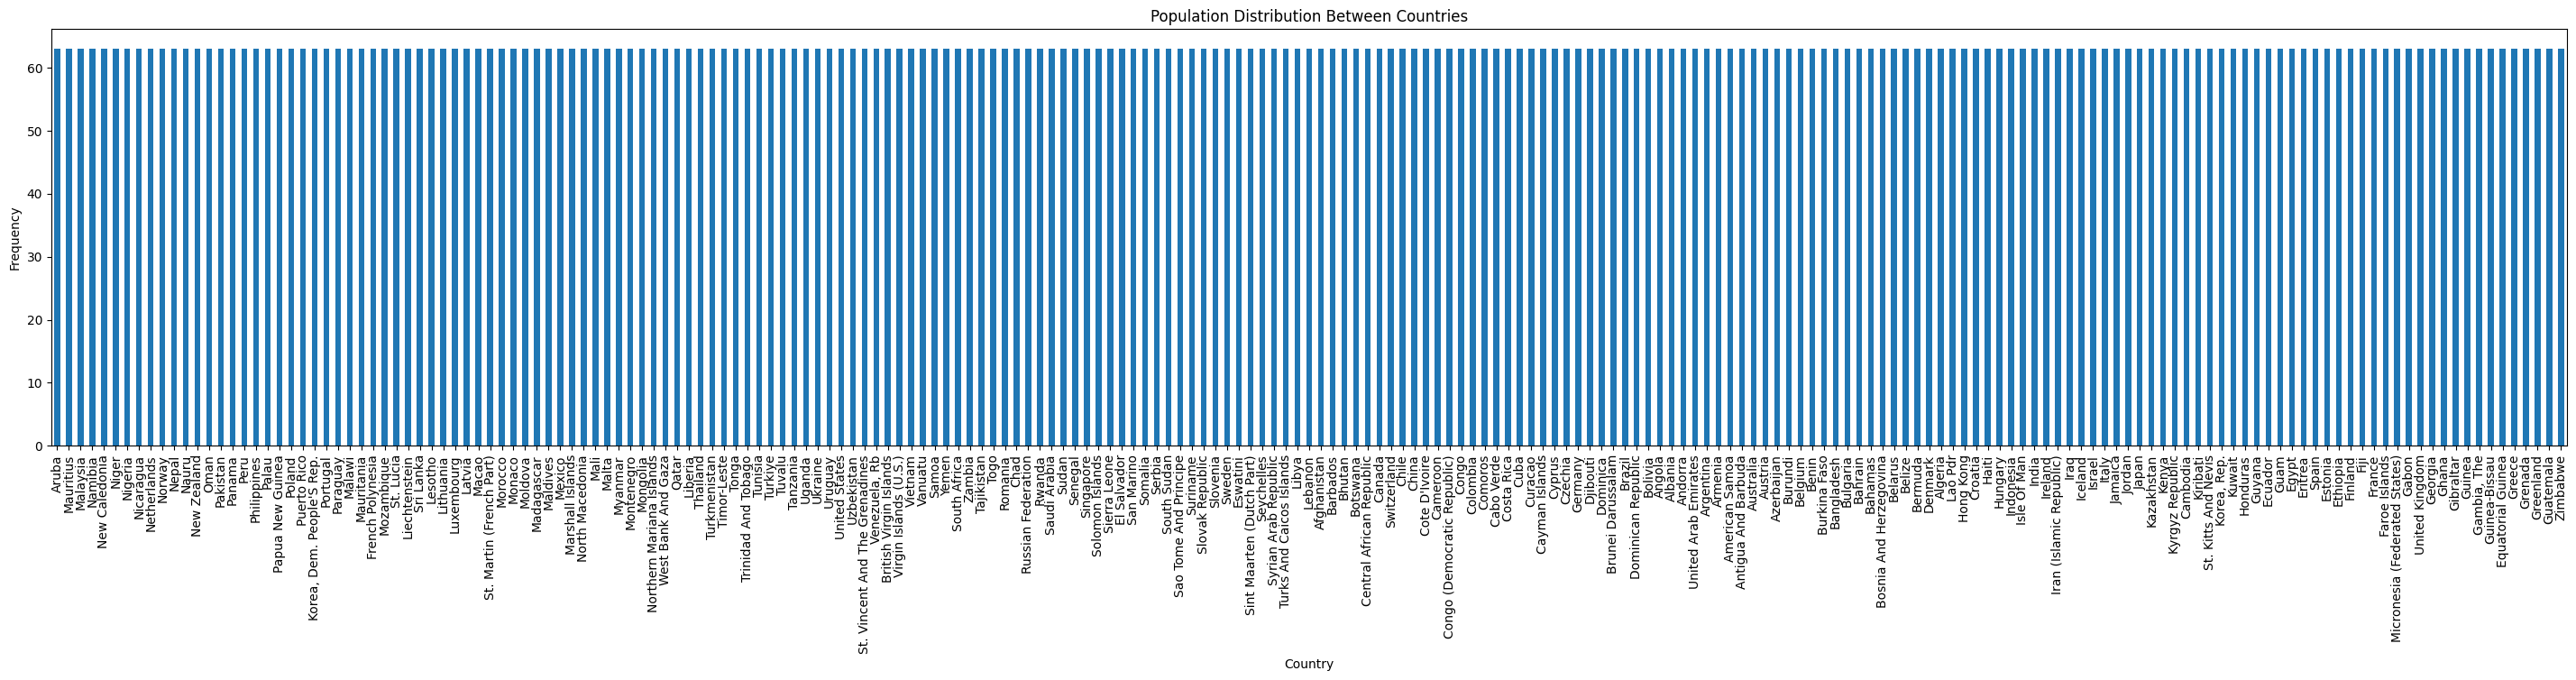

In [ ]:
# determine data imbalance check through visualization
import matplotlib.pyplot as plt
import seaborn as sns
country_df['country_name'].value_counts().plot(kind='bar', figsize=(36,6))
plt.title('Population Distribution Between Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

All of these countries are equal in terms of information regarding their time series analyses.

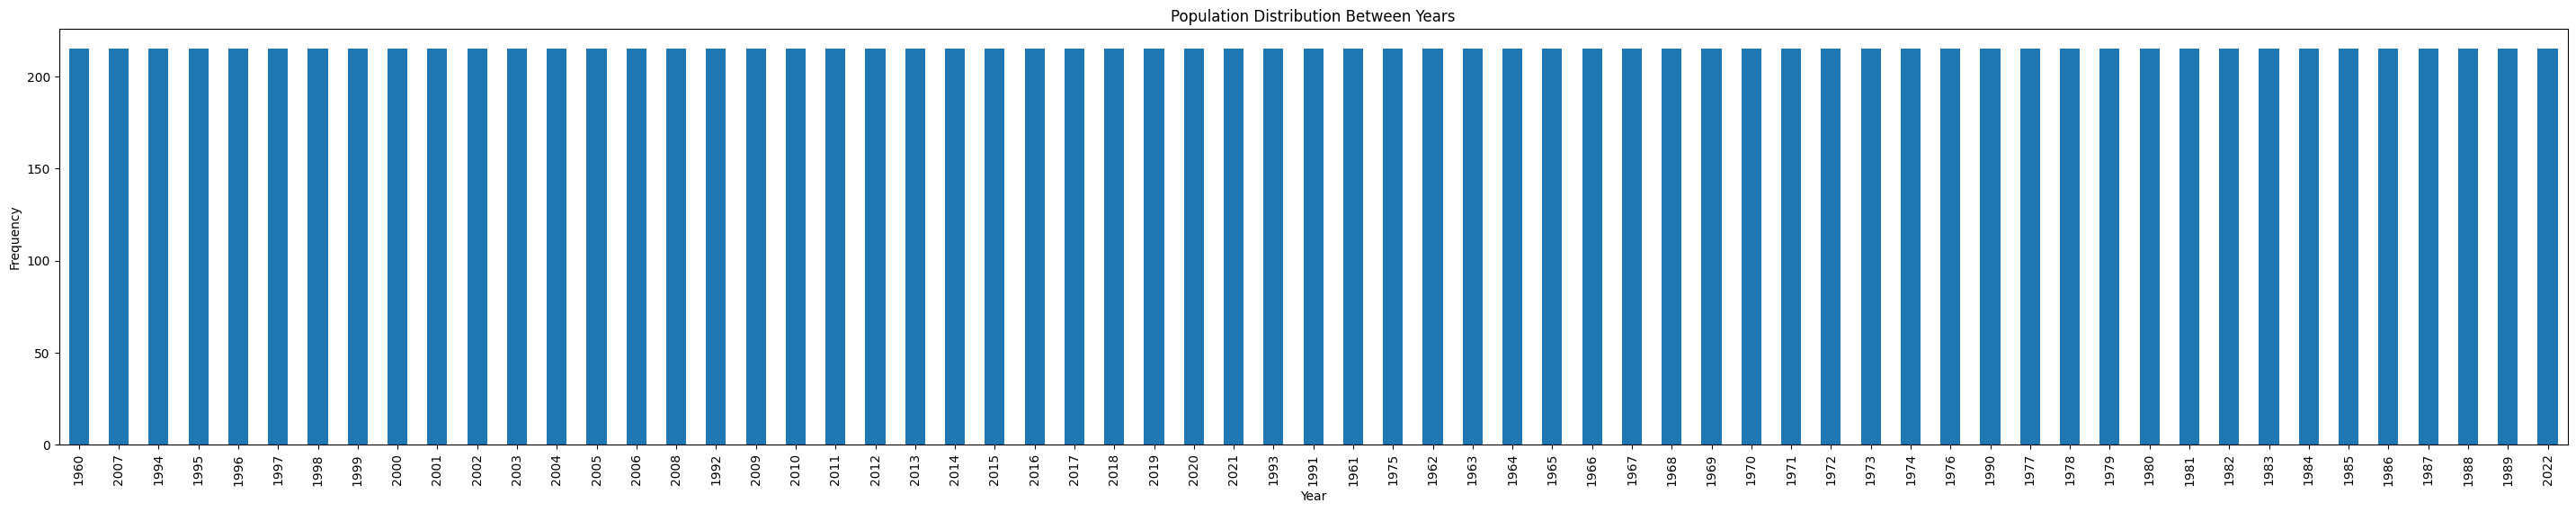

In [ ]:
# check distribution over years
country_df['year'].value_counts().plot(kind='bar', figsize=(36,6))
plt.title('Population Distribution Between Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

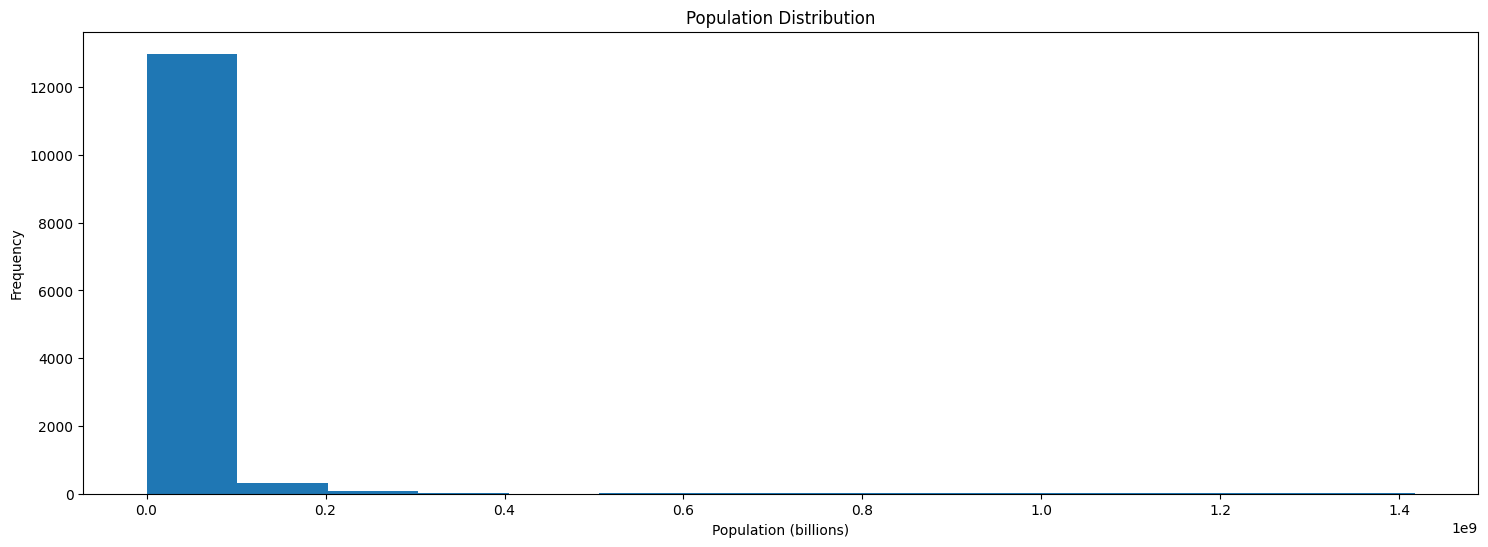

In [ ]:
# graph representations
country_df['population'].plot(kind='hist', bins=14, figsize=(18,6))
plt.title('Population Distribution')
plt.xlabel('Population (billions)')
plt.ylabel('Frequency')
plt.show()

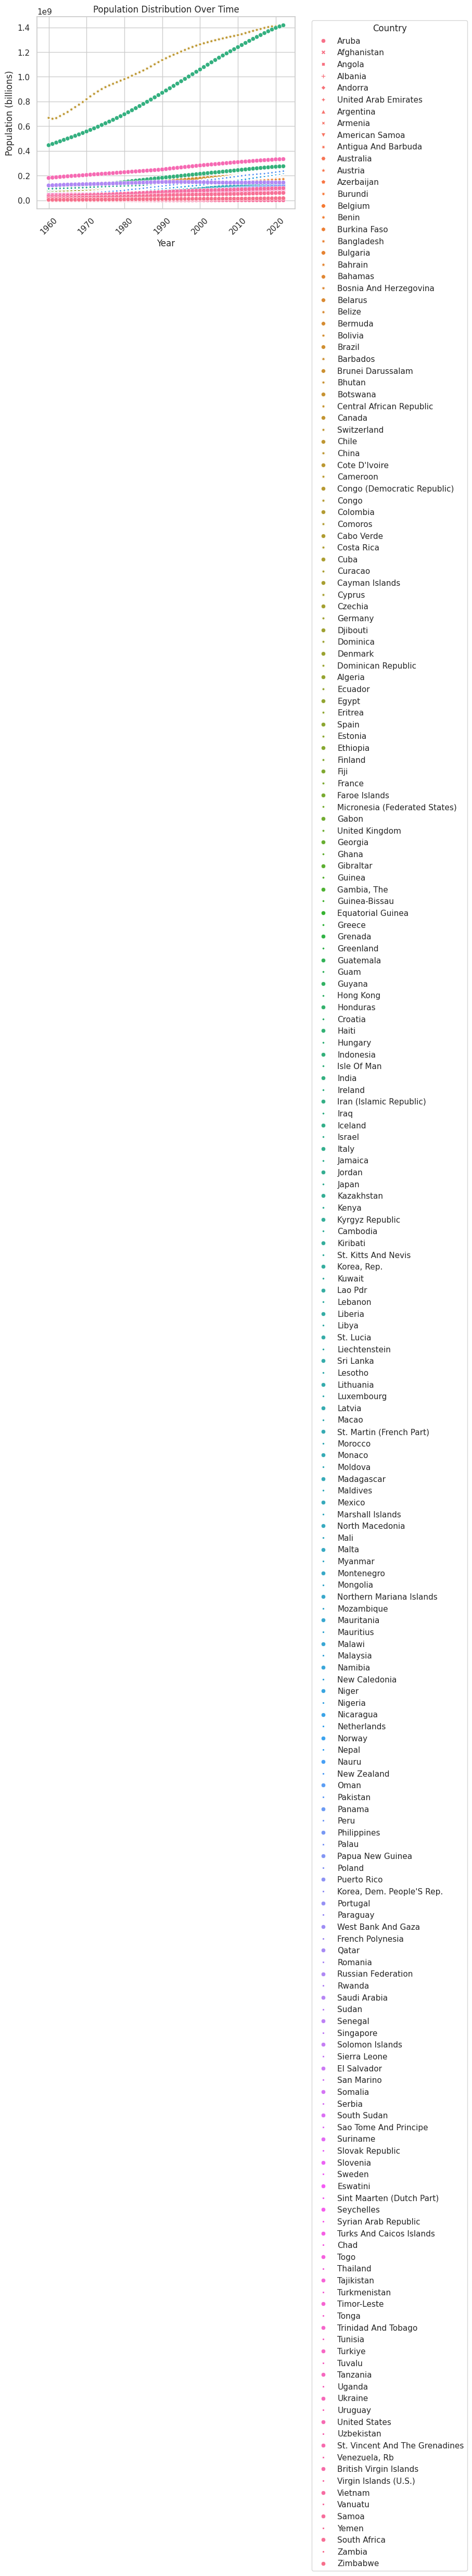

In [ ]:
# scatter matrix
sns.set_theme(style="whitegrid")
sns.scatterplot(x='year', y='population', data=country_df, hue='country_name', style='country_name')
plt.title('Population Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Population (billions)')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bangladesh'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'China'),
  Text(3, 0, 'Indonesia'),
  Text(4, 0, 'India'),
  Text(5, 0, 'Japan'),
  Text(6, 0, 'Nigeria'),
  Text(7, 0, 'Pakistan'),
  Text(8, 0, 'Russian Federation'),
  Text(9, 0, 'United States')])

<Figure size 640x480 with 0 Axes>

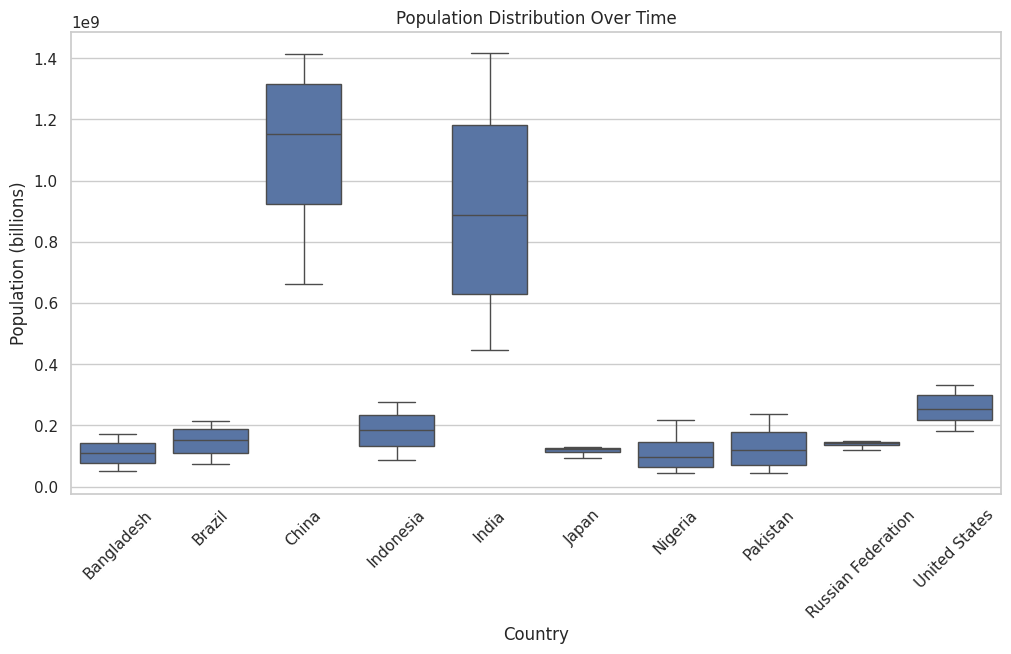

In [ ]:
# boxplot of population by country (specifically for those with largest populations)
largest_population = country_df.groupby('country_name')['population'].sum().nlargest(10)
top_countries = country_df[country_df['country_name'].isin(largest_population.index)]
plt.figure(facecolor='lightgray')
plt.figure(figsize=(12,6))
sns.boxplot(x='country_name', y='population', data=top_countries)
plt.title('Population Distribution Over Time')
plt.xlabel('Country')
plt.ylabel('Population (billions)')
plt.xticks(rotation=45)

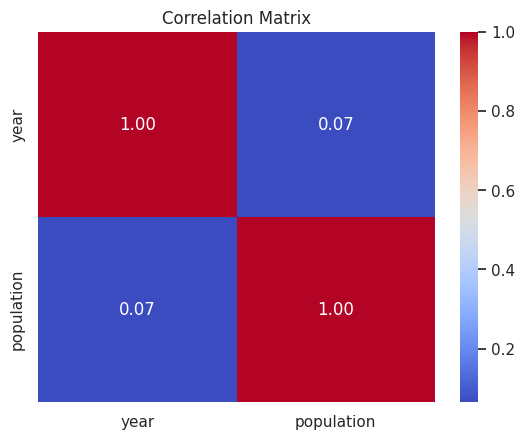

In [ ]:
# correlative matrix heatmap
corr_matrix = country_df[['year', 'population']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Questions regarding this statistical analysis will be what changes in society have led to significant population growth? What years demonstrate the highest amount of population growth. What countries have decline population rates and why? Why do countries with similar economic thresholds differ in population growth?

Global population will tend to grow steadily over time but faster growth rates are more likely to occur around the world in more recent years. There is no significant correlation between high populations and high growth rates, in the sense that lower populations in 1960 can have expotential growth rates but countries with high populations can also have high growth rates.

Predictive Analysis

In [ ]:
# relevant imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# prepare data
X = country_df[['year']]
y = country_df['population']

In [ ]:
# scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
# split data up between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

In [ ]:
# initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

In [ ]:
# train models
trained_models = {}
for name, model in models.items():
    trained_models[name] = model.fit(X_train, y_train_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Comparison

In [ ]:
# determine model performance
model_performance = {}
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    model_performance[name] = {'MSE': mse, 'R-squared': r2}

In [ ]:
# create function to calculate confidence intervals
import numpy as np
def calculate_confidence_interval(predictions):
    n = len(predictions)
    mean = np.mean(predictions)
    std_error = np.std(predictions, ddof=1) / np.sqrt(n)
    h = 1.96 * std_error
    return mean - h, mean + h

In [ ]:
# determine confidence intervals
confidence_intervals = {}
for name, model in trained_models.items():
    y_pred = trained_models[name].predict(X_test)
    ci = {}
    ci[name] = calculate_confidence_interval(y_pred)
    confidence_intervals[name] = ci[name]

In [ ]:
# output results
print("Model Performance:")
for name, metrics in model_performance.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R-squared: {metrics['R-squared']}")

Model Performance:
Linear Regression:
  MSE: 8993361102027358.0
  R-squared: 0.0014261686206321622
Decision Tree:
  MSE: 9089542885987956.0
  R-squared: -0.00925333278366347
Random Forest:
  MSE: 9091397138614362.0
  R-squared: -0.009459218895484067
Support Vector Machine:
  MSE: 9387997385485818.0
  R-squared: -0.042392094774306166


These mean squared values are egregious and considerable time was spent trying to modify them to no avail.

In [ ]:
# check for overfitting
train_performance = {}
for name, model in trained_models.items():
    y_pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    train_performance[name] = {'MSE': mse_train, 'R-squared': r2_train}
print("Training Performance:", train_performance)

Training Performance: {'Linear Regression': {'MSE': 1.1378085613440492e+16, 'R-squared': 0.004754225121958222}, 'Decision Tree': {'MSE': 1.1367366043373408e+16, 'R-squared': 0.005691870274247446}, 'Random Forest': {'MSE': 1.1367970082669686e+16, 'R-squared': 0.005639034711402813}, 'Support Vector Machine': {'MSE': 1.1881891309077926e+16, 'R-squared': -0.0393138639202224}}


In [ ]:
!pip install shap
import shap

In [ ]:
# compute shap values
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

ExactExplainer explainer: 2710it [00:11, 14.12it/s]                           


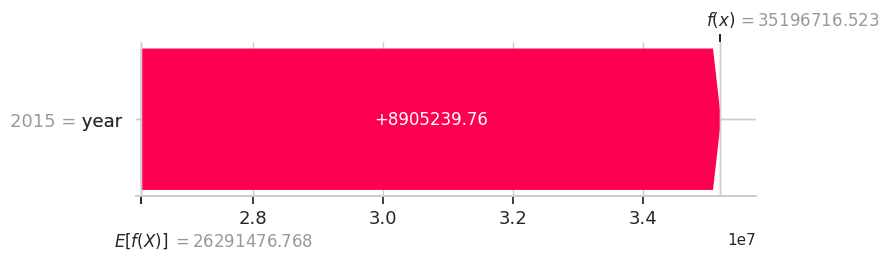

In [ ]:
# visual predictions
shap.plots.waterfall(shap_values[0])

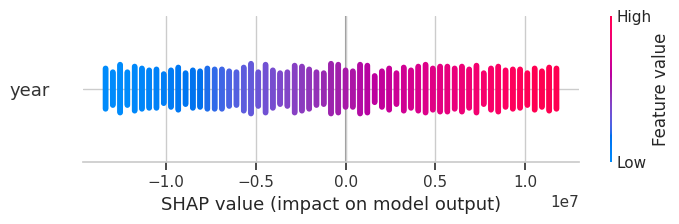

In [ ]:
# visualize feature importance
shap.plots.beeswarm(shap_values)

There is not much variance in these shap values indicating strong accuracy from the scaled information.

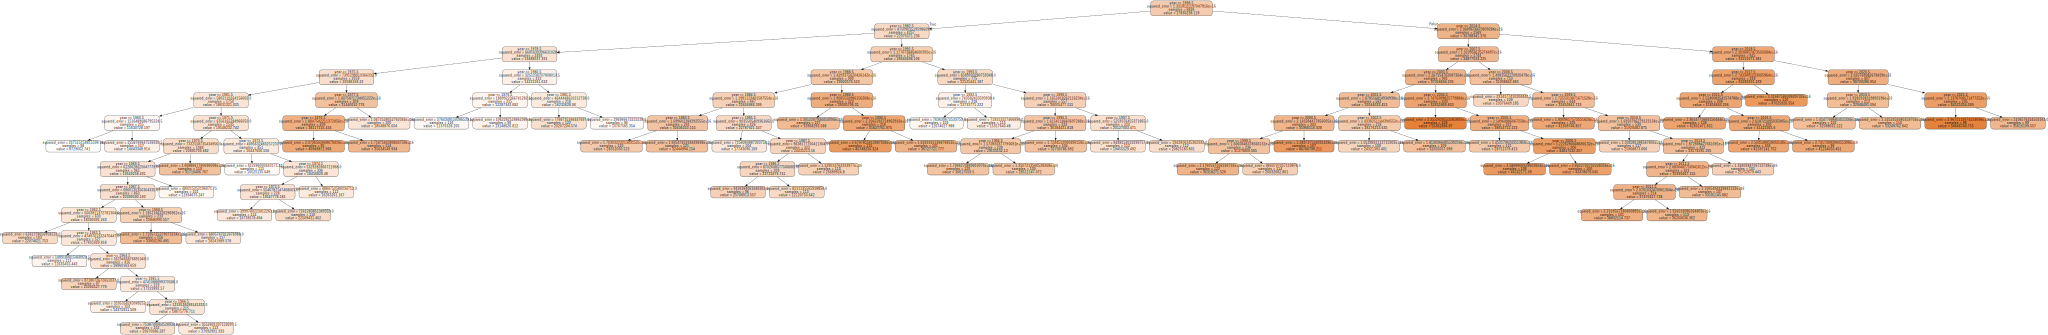

In [ ]:
# visualize with random forest model
from sklearn.tree import export_graphviz
import graphviz
# access models
rf_model = trained_models['Random Forest']
# create single tree from random forest tree
tree_dot = export_graphviz(rf_model.estimators_[0], out_file=None, feature_names=['year'], filled=True, rounded=True)
tree_graph = graphviz.Source(tree_dot)
tree_graph.render(filename='tree', format='png')
tree_graph

This decision tree separates the data by year and determines different error values based on threshold. A lot of these do not appear to be accurate.

CONCLUSION

The goal of this report was to find was to find growth across different countries from 1960 to 2022 and determine how to find future population trends. Population growth has a wide variety of influences and can effect first world countries and third world countries alike.

Generally, populations have not only increased overtime but population growth has significantly increased in recent years due to widespread industrialization and development. France is an example where population has remained at a low increase rate due to cultural norms and a low fertility rate, despite a strong economy. With India and China, the two most populated countries in the world, have the fastest growing populations in the world. Despite mixed economic indicators, they have incredibly high fertility rates and relatively youthful populations.

The Random Forest Generator was the best performing model. This information could have led to the chance of strong insights. On a larger scale, this information could be presented to governmental instutions by each country to make policies that effective manage population growth. This information requires persistence and updating for maintainability but there is plenty of potential in these type of measurements.